<a href="https://colab.research.google.com/github/micsung/DataAnalysis/blob/main/kNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline

# 新增區段

In [2]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)

/root


In [3]:
import requests
# Change this to the location of your dataset 電離層
dataset_filename = "ionosphere.data" 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
r = requests.get(url, allow_redirects=True)

open(dataset_filename, 'wb').write(r.content)

76467

In [10]:
import csv
import numpy as np

# Size taken from the dataset and is known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(dataset_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        print("row[:-1] {0}".format(row[:-1]))
        print("data {0}".format(data))
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

row[:-1] ['1', '0', '0.99539', '-0.05889', '0.85243', '0.02306', '0.83398', '-0.37708', '1', '0.03760', '0.85243', '-0.17755', '0.59755', '-0.44945', '0.60536', '-0.38223', '0.84356', '-0.38542', '0.58212', '-0.32192', '0.56971', '-0.29674', '0.36946', '-0.47357', '0.56811', '-0.51171', '0.41078', '-0.46168', '0.21266', '-0.34090', '0.42267', '-0.54487', '0.18641', '-0.45300']
data [1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453]
row[:-1] ['1', '0', '1', '-0.18829', '0.93035', '-0.36156', '-0.10868', '-0.93597', '1', '-0.04549', '0.50874', '-0.67743', '0.34432', '-0.69707', '-0.51685', '-0.97515', '0.05499', '-0.62237', '0.33109', '-1', '-0.13151', '-0.45300', '-0.18056', '-0.35734', '-0.20332', '-0.26569', '-0.20468', '-0.18401', '-0

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [22]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [23]:
estimator.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [25]:

from sklearn.model_selection import cross_val_score

In [26]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


In [27]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

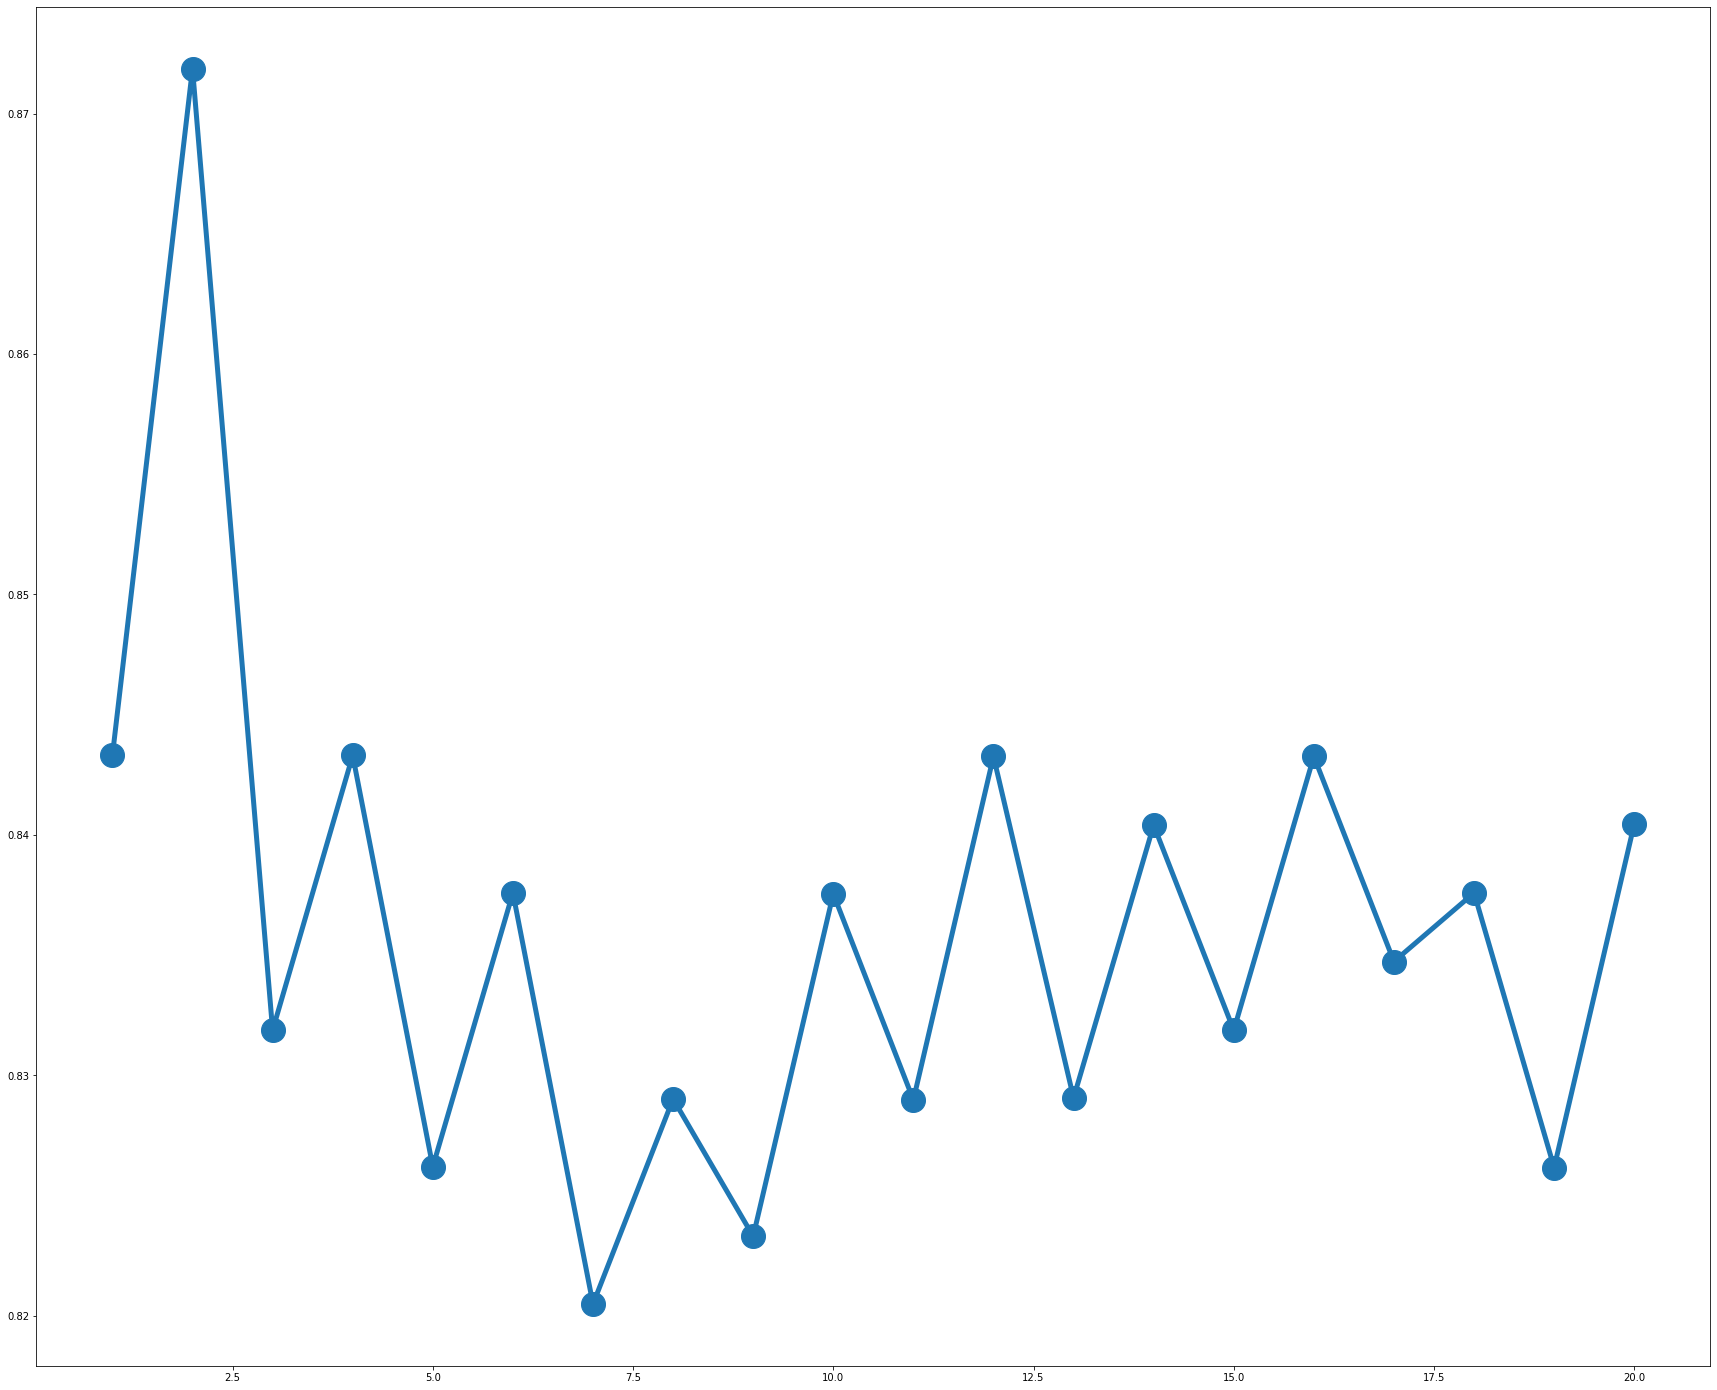

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30,25))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

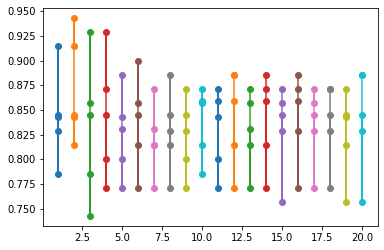

In [32]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

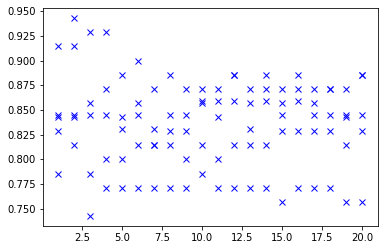

In [33]:
plt.plot(parameter_values, all_scores, 'bx')

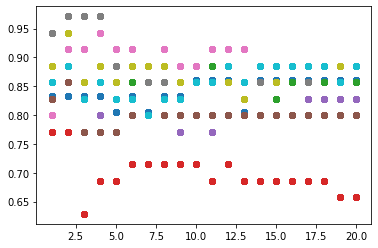

In [34]:

from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

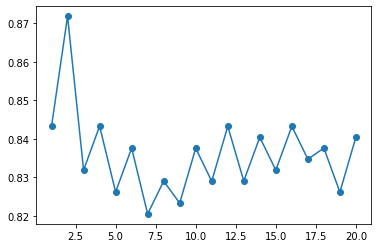

In [35]:

plt.plot(parameter_values, avg_scores, '-o')